In [15]:
!pip install diffusers transformers accelerate torch --quiet

import os
import torch
from diffusers import StableDiffusionPipeline

output_dir = "synthetic_dataset"
os.makedirs(output_dir, exist_ok=True)

model_id = "segmind/tiny-sd"

if torch.cuda.is_available():
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
else:
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
    pipe = pipe.to("cpu")

prompts = [
    "A futuristic smart city in 2050",
    "A cute robot studying in a classroom",
    "Sunset over Himalayan mountains",
    "AI humanoid assistant in laboratory",
    "Cyberpunk Tokyo street at night"
]
# In diffusion models: Text → converted to embeddings → used to guide image generation.
for i, prompt in enumerate(prompts):
    image = pipe(prompt, num_inference_steps=20).images[0]
    image.save(f"{output_dir}/image_{i+1}.png")

print("Dataset Generated Successfully!")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Dataset Generated Successfully!


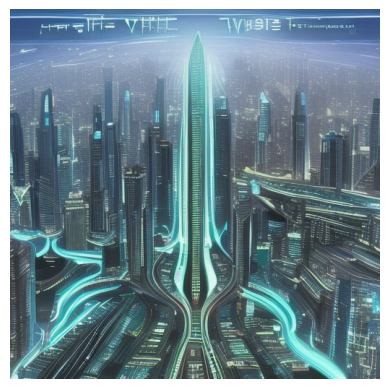

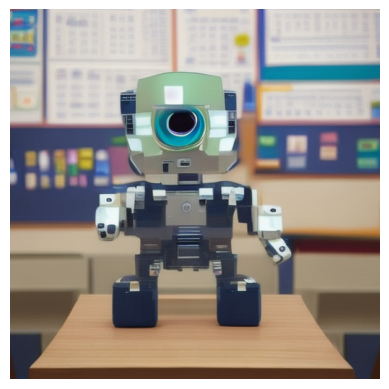

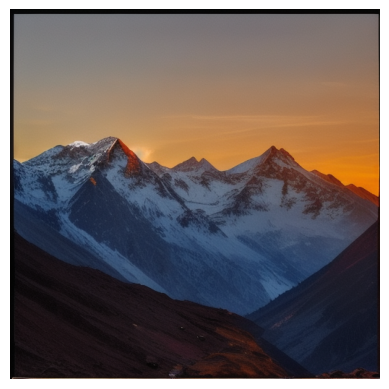

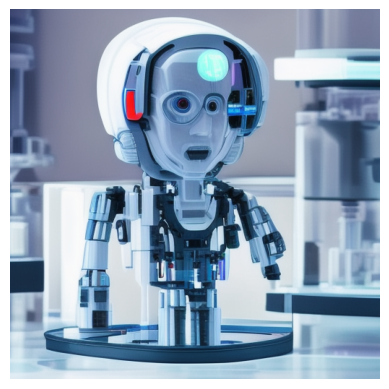

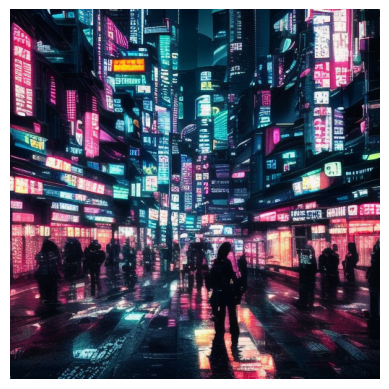

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

for i in range(1, 6):
    img = Image.open(f"synthetic_dataset/image_{i}.png")
    plt.imshow(img)
    plt.axis("off")
    plt.show()
